<a href="https://colab.research.google.com/github/DhruvJ-7/BRAINS-DhruvJ-7/blob/main/Week_2_Assignment_240355_Dhruv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement 1:

Q1: Leverage less than 1 indicates that we are using less amount of capital than the capital we already have. Eg. we have 100 Rs. but we invest 40 Rs. only. It is not a common trading practice as it reduces the amount of exposure and thus the potential profitability. It may be used in conditions where we expect high volatility and risk. Situations where we are not sure as to go red or green.

Q2: In Risk Management, static stop loss refers to a definite stop loss, at which a trade will close anyhow. It doesn't matter if stock goes way high, the stop loss will remain fixed. Trailing Stop Loss means, it is a dynamic threshold, if stock price goes up, stop loss moves up. It helps in more frequent realization of profits. In a trending market, of course trailing stop loss is a smart choice, as it can read the trends and follow, helping the trader not to go too high and not be able to realize the profit.
In a volatile market, static and trailing won't make a big difference as wild swings may lead to accidentally hitting the stop loss and exiting. Instead it is easier for trailing stop loss to get hit than static.

Q3: Trailing Take Profit is not so necessary as the same trends which a Trailing Stop Loss captures, the trailing profit too captures. Instead it is better to take traiing stop loss as it provides an extra benefit of preventing grave injuries or drawdown.

Q4: Though a stop loss is intended to work at a price downfall in price. There may be a case say today the close was above stop loss, next day maybe due to stock dilution or splitting or the market may open lower, the market opens at a price lower than stop loss, and say it remains lower throughout the day. So the chart never actually crossed the stop loss in reality but it did virtually.

# Problem Statement 2:

In [208]:
import yfinance as yf
import pandas as pd
import numpy as np


def download_flat_yf(ticker, start, end, interval):

 data = yf.download(ticker, start=start, end=end, interval=interval, progress=False)

 if isinstance(data.columns, pd.MultiIndex):
    data = data.xs(ticker, axis=1, level=1)

 data.columns.name = None
 data.reset_index(inplace=True)
 data.columns = [col.lower() for col in data.columns]
 if data.columns[0] in ['date', 'datetime']:
    data.rename(columns={data.columns[0]: 'datetime'}, inplace=True)
 data['datetime'] = pd.to_datetime(data['datetime'])
 return data

stock_symbol = 'LT.NS'
data = download_flat_yf(stock_symbol, start='2019-01-01', end='2024-01-01', interval='1d')
data.head()

,datetime,close,high,low,open,volume
0,2019-01-01,1295.629028,1298.414532,1280.623064,1298.414532,786846
1,2019-01-02,1280.892578,1298.324600,1273.344680,1294.820207,2058504
2,2019-01-03,1253.486572,1284.037499,1249.892346,1281.341829,2290756
3,2019-01-04,1247.241699,1264.808417,1234.212627,1259.686688,2711485
4,2019-01-07,1243.422729,1265.706868,1239.154585,1255.283633,1851513


In [209]:
import plotly.graph_objects as go
candle_chart = go.Figure(data=
                [go.Candlestick(
                x =data.index,
                open = data['open'],
                high = data['high'],
                low = data['low'],
                close = data['close'])])
candle_chart.update_layout(title=f"Closing Price vs Date for {stock_symbol}", xaxis_title = 'Date', yaxis_title = 'Price')
candle_chart.show()

In [210]:
def doji(data):

  body = abs(data['close'] - data['open'])
  shadow = data['high'] - data['low']
  shadow = shadow.replace(0,1e-5)

  return body/shadow <= 0.05

In [211]:
def hammer(data):
  body = abs(data['close'] - data['open'])
  shadowred = (data[['close','open']]).max(axis = 1) - data['low']
  shadowgreen = data['open'] - (data[['close','open']]).min(axis = 1)

  body = body.replace(0,1e-5)

  hammer_cond = (
      (shadowred/body >= 2) &
      (shadowgreen/body >= 0.5) &
      (data['close'] > data['open']) &
      (data['close'].shift(1) < data['open'].shift(1)) &
      (data['close'].shift(-1) > data['open'].shift(-1))
  )
  return hammer_cond

In [212]:
def engulf(data):
  engulf_cond = (
      (data['close'] > data['open']) &
      (data['close'].shift(1) < data['open'].shift(1)) &
      (data['open'].shift(1) < data['close']) &
      (data['close'].shift(1) > data['open'])
  )
  return engulf_cond

In [213]:
data['doji'] = doji(data)
data['hammer'] = hammer(data)
data['engulf'] = engulf(data)
print(data.head())

    datetime        close         high          low         open   volume  \
0 2019-01-01  1295.629028  1298.414532  1280.623064  1298.414532   786846   
1 2019-01-02  1280.892578  1298.324600  1273.344680  1294.820207  2058504   
2 2019-01-03  1253.486572  1284.037499  1249.892346  1281.341829  2290756   
3 2019-01-04  1247.241699  1264.808417  1234.212627  1259.686688  2711485   
4 2019-01-07  1243.422729  1265.706868  1239.154585  1255.283633  1851513   

    doji  hammer  engulf  
0  False   False   False  
1  False   False   False  
2  False   False   False  
3  False   False   False  
4  False   False   False  


In [214]:
print(data['doji'].value_counts())
print(data['hammer'].value_counts())
print(data['engulf'].value_counts())


doji
False    1177
True       58
Name: count, dtype: int64
hammer
False    1235
Name: count, dtype: int64
engulf
False    1201
True       34
Name: count, dtype: int64


Hence total number of patterns is 58 + 0 + 34 = 92



---



Doji -> 58



Hammer -> 0

Engulf -> 34

In [215]:
def winnumber(pattern,n):
 wins = 0

 for i in range(len(data)-n):
  if data[pattern].iat[i]:
   if data['close'].iat[i] < data['close'].iat[i+n]:
      wins += 1

 return wins



For n = 3 ->

In [216]:
print(winnumber('doji',3))
print(winnumber('hammer',3))
print(winnumber('engulf',3))

28
0
19


For n = 5 ->

In [217]:
print(winnumber('doji',5))
print(winnumber('hammer',5))
print(winnumber('engulf',5))

35
0
23


In [218]:
def baseline(n, pattern):
  wins = 0
  for i in range(n**2 + 10, 10 + data[pattern].sum()*5, 5):
    if data['close'].iat[i] < data['close'].iat[i+n]:
      wins += 1
  return wins



In [219]:
print(baseline(3, 'doji'))
print(baseline(3, 'hammer'))
print(baseline(3, 'engulf'))

23
0
15


In [220]:
print(baseline(5, 'doji'))
print(baseline(5, 'hammer'))
print(baseline(5, 'engulf'))

23
0
16


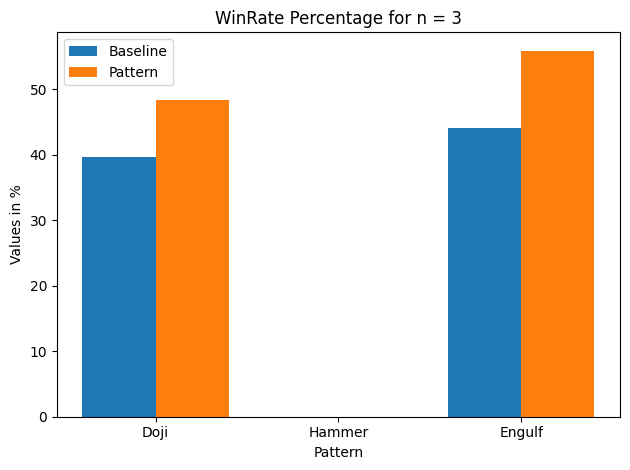

In [221]:
import matplotlib.pyplot as plt


labels = ['Doji', 'Hammer', 'Engulf']
data1 = [baseline(3,'doji')/58*100, baseline(3,'hammer')*0, baseline(3,'engulf')/34*100]
data2 = [winnumber('doji', 3)/58*100, winnumber('hammer', 3)*0, winnumber('engulf', 3)/34*100]

x = np.arange(len(labels))
width = 0.40

plt.bar(x - width/2, data1, width, label='Baseline')
plt.bar(x + width/2, data2, width, label='Pattern')

plt.xticks(x, labels)
plt.xlabel("Pattern")
plt.ylabel("Values in %")
plt.title("WinRate Percentage for n = 3")
plt.legend()

plt.tight_layout()
plt.show()

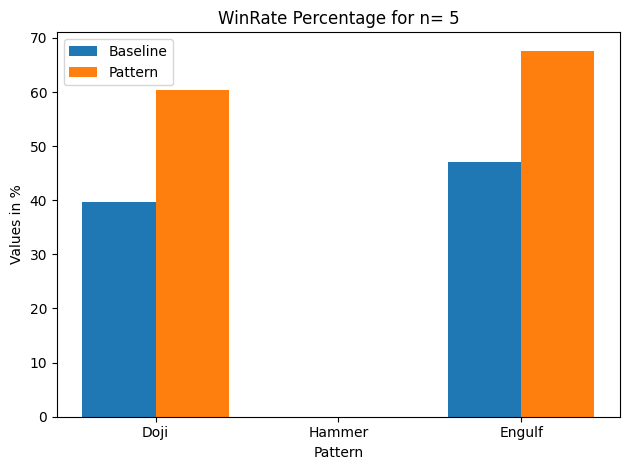

In [222]:
labels = ['Doji', 'Hammer', 'Engulf']
data1 = [baseline(5,'doji')/58*100, baseline(5,'hammer')*0, baseline(5,'engulf')/34*100]
data2 = [winnumber('doji', 5)/58*100, winnumber('hammer', 5)*0, winnumber('engulf', 5)/34*100]

x = np.arange(len(labels))
width = 0.40

plt.bar(x - width/2, data1, width, label='Baseline')
plt.bar(x + width/2, data2, width, label='Pattern')

plt.xticks(x, labels)
plt.xlabel("Pattern")
plt.ylabel("Values in %")
plt.title("WinRate Percentage for n= 5")
plt.legend()

plt.tight_layout()
plt.show()

We can certainly see the statistical edge of pattern based trades which were a win and randomly taken data. In case of n = 5 this edge was more. As in random data more or less the win percentage sticks around 50 %, which is because we assume the market to be in a random walk fashion. We also see n = 5 giving better win percentage than win = 3. It is because these patterns are ought to work, but only if we provide enough data. In less data there might be certain exceptions dominating which can alter the data.

# Problem Statement 3:

In the given image it is evident that the two major indicators used are the Supertrends and MFI.



What are SuperTrends: It is a trend which shows the overall trend followed by the market.


For calculating supertrend,

*   If close[i] > upperband --> Bullish
*   If close[i] < lowerband --> Bearish
*   Else trend continues and for bullish, lowerband remains constant while for bearish, upperband remains constant
*   Supertrend is simply the lowerband for bullish and upperband for bearish.

The upperband and lowerband are simply (high+low)/2 + or - k*ATR.    
Where k is a multiplier depending on person.





What is MFI: It is an indicator which measures how much 'money' is flowing into and out of market. It uses price and volume, making it essentially the weighted version of RSI. While RSI measures the price only, it fails to grasps situation where even though price is increasing, market have a bearish pressure and thus helps predict the market little earlier than the trend.

It is calculated by this method.  
Typical Price = avg(high,low,close)  
Raw Money Flow = TP*volume (weighted price)  
Money Flow Ratio is ratio of sum of positive RMF and sum of negative RMF.  
MFI = 100 - [100/1+MFR]  
Simply if it is above 80, overbought situation and if below 20, oversold situation.


SuperTrend ⚡

In [223]:
def supertrend(data, multiplier, period =7):
  avg = (data['high']+data['low'])/2
  tr = pd.concat([
        data['high'] - data['low'],
        (data['high'] - data['close'].shift(1)).abs(),
        (data['low'] - data['close'].shift(1)).abs()
    ], axis=1).max(axis=1)

  atr = tr.rolling(window = period).mean()

  upperband = avg + multiplier * atr
  lowerband = avg - multiplier * atr

  supertrend = pd.Series(index=data.index)

  supertrend = [None] * len(data)
  superdir   = [None] * len(data)


  for i in range(period, len(data)):

    if data['close'][i] > upperband[i-1]:
            superdir[i] = 1
    elif data['close'][i] < lowerband[i-1]:
            superdir[i] = -1
    else:
      superdir[i] = superdir[i-1] if superdir[i-1] is not None else 1

      if superdir[i] == 1 and pd.notna(supertrend[i - 1]) and lowerband[i] < supertrend[i - 1]:
                lowerband[i] = supertrend[i - 1]
      if superdir[i] == -1 and pd.notna(supertrend[i - 1]) and upperband[i] > supertrend[i - 1]:
                upperband[i] = supertrend[i - 1]

    if superdir[i] == 1:
        supertrend[i] = lowerband[i]
    else:
        supertrend[i] = upperband[i]




  data['supertrend'] = supertrend
  data['superdir'] = superdir
  return data

Money Flow Index 💸

In [224]:
def mfi(data, period = 14):
  typical_price = (data['high'] + data['low'] + data['close'])/3
  raw_money = typical_price*data['volume']

  positives = []
  negatives = []

  for i in range(1,len(data)):
    a = typical_price[i] - typical_price[i-1]
    if a > 0:
      positives.append(raw_money[i])
      negatives.append(0)
    elif a < 0:
      positives.append(0)
      negatives.append(raw_money[i])
    else:
      positives.append(0)
      negatives.append(0)

  positive_mf = pd.Series(positives).rolling(window = period).sum()
  negative_mf = pd.Series(negatives).rolling(window = period).sum()

  money_flow_ratio = positive_mf/negative_mf
  money_flow_index = 100 - (100/ ( 1 + money_flow_ratio ))

  data['mfi'] = money_flow_index
  return data

So the idea for StrategyX according to my inference is that when both the indicators give a go signal, it is safe to buy, and when both the indicators give a stop signal, short. i.e. we  always remain in a position, long or short. Esentially, we are never exiting the stock completely because according to me that does not make sense to put 0% capital, as either you bet for the market or against, and if you have a doubt based on high volatility then proportionate your capital accordingly which I did in Strategy Y.

In [225]:
def stratX(data, oversold = 30, overbought = 80, initial_cap = 10_000_000):
  position = [] # Only 1 or -1 signals

  for i in range(len(data)):
        if data['superdir'][i] == 1 and data['mfi'][i] < oversold:
            position.append(1)

        elif data['superdir'][i] == -1 and data['mfi'][i] > overbought:
            position.append(-1)

        else:
            position.append(position[-1] if i > 0 else 0) #i.e to hold 1 or -1 when no change in trend.

  data['position'] = position

  #Backtesting Part ~~~~~~~~~~~~~~~~~~~~~~~~>>>>>

  data['daily_returns'] = data['close'].pct_change()
  data['strategy_returns'] = data['daily_returns'] * data['position'].shift(1)
  data['cumulative_returns'] = (1 + data['strategy_returns']).cumprod()

  #Metrics ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>>>>>
  b = data['strategy_returns'].std()
  sharpe_ratio = np.sqrt(252) * data['strategy_returns'].mean() / b if b != 0 or np.isnan(b) else np.nan
  max_drawdown = ((data['cumulative_returns'] / data['cumulative_returns'].cummax()) - 1).min()
  strategy_ret = data['cumulative_returns'].iloc[-1] - 1

  final_cap = initial_cap*data['cumulative_returns'].iloc[-1]

  return {

        'total_return': strategy_ret,
        'sharpe_ratio': sharpe_ratio,
        'max_drawdown': max_drawdown,
        'final_capital': final_cap
    }


Now I will make a few changes in Strategy X. Firstly volatility induced capital allocation, to make it safe. If volatility is low allocate 100% cap, if is medium allocate 60%, if it is high allocate 25%. Lesse how it goes.

In [226]:
def stratY(data, oversold = 30, overbought = 80, initial_cap = 10_000_000, period = 14, thresh1 = 0.01, thresh2 = 0.03):
  position = [] # Only 1 or -1 signals

  for i in range(len(data)):
        if data['superdir'][i] == 1 and data['mfi'][i] < oversold:
            position.append(1)

        elif data['superdir'][i] == -1 and data['mfi'][i] > overbought:
            position.append(-1)

        else:
            position.append(position[-1] if i > 0 else 0) #i.e to hold 1 or -1 when no change in trend.

  data['position'] = position
  data['daily_returns'] = data['close'].pct_change()

  data['vol_stratY'] = data['daily_returns'].rolling(window = period).std()

  def cap_alloc(data):
    if np.isnan(data['vol_stratY']):
      return 0
    elif data['vol_stratY'] < thresh1:
      return 1
    elif data['vol_stratY'] < thresh2:
      return 0.8
    else:
      return 0.2

  data['weights'] = data.apply(cap_alloc, axis = 1)


  #Backtesting Part ~~~~~~~~~~~~~~~~~~~~~~~~>>>>>


  data['strategy_returns'] = data['daily_returns'] * data['position'].shift(1)*data['weights'] #<---- Change in StratX to StratY
  data['cumulative_returns'] = (1 + data['strategy_returns']).cumprod()

  #Metrics ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>>>>>

  b = data['strategy_returns'].std()
  sharpe_ratio = np.sqrt(252) * data['strategy_returns'].mean() / b if b != 0 or np.isnan(b) else np.nan

  max_drawdown = ((data['cumulative_returns'] / data['cumulative_returns'].cummax()) - 1).min()
  strategy_ret = data['cumulative_returns'].iloc[-1] - 1

  final_cap = initial_cap*data['cumulative_returns'].iloc[-1]

  return {

        'total_return': strategy_ret,
        'sharpe_ratio': sharpe_ratio,
        'max_drawdown': max_drawdown,
        'final_capital': final_cap
    }

In [227]:
def download_flat_yf(ticker, start, end, interval):
 data = yf.download(ticker, start=start, end=end, interval=interval, progress=False)
 if isinstance(data.columns, pd.MultiIndex):
   data = data.xs(ticker, axis=1, level=1)

 data.columns.name = None
 data.reset_index(inplace=True)
 data.columns = [col.lower() for col in data.columns]
 if data.columns[0] in ['date', 'datetime']:
  data.rename(columns={data.columns[0]: 'datetime'}, inplace=True)

 data['datetime'] = pd.to_datetime(data['datetime'])
 return data

stock_symbol = 'CAMS.NS'
data = download_flat_yf(stock_symbol, start='2024-01-01', end='2025-05-04', interval='1d')
data.head()
supertrend(data,4)
mfi(data)

,datetime,close,high,low,open,volume,supertrend,superdir,mfi
0,2024-01-01,2598.785889,2626.750925,2593.683544,2609.088797,66066,NaN,NaN,NaN
1,2024-01-02,2619.588135,2644.413287,2600.797687,2605.164110,143141,NaN,NaN,NaN
2,2024-01-03,2602.318848,2635.386234,2599.767555,2620.569573,112428,NaN,NaN,NaN
3,2024-01-04,2657.512695,2693.229349,2620.863682,2624.788600,268532,NaN,NaN,NaN
4,2024-01-05,2696.565430,2716.042929,2661.290281,2674.095373,354882,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
323,2025-04-25,3938.100098,4097.899902,3890.000000,4058.500000,494714,3607.985386,1.0,60.430352
324,2025-04-28,3944.100098,3974.800049,3900.000000,3934.000000,206250,3607.985386,1.0,67.073185
325,2025-04-29,3999.800049,4038.199951,3955.500000,3964.800049,253569,3607.985386,1.0,69.487565
326,2025-04-30,3906.300049,4020.000000,3883.300049,4000.000000,250408,3607.985386,1.0,65.362391


Testing the strategies and their metrics

In [228]:
resX = stratX(data)
resY = stratY(data)

table = pd.DataFrame([
    {
        'Strategy': 'Strategy X',
        'Total Return (%)': resX['total_return'] * 100,
        'Sharpe Ratio': resX['sharpe_ratio'],
        'Max Drawdown (%)': resX['max_drawdown'] * 100,
        'Final Capital': f" ₹ {resX['final_capital']:,.0f}"
    },
    {
        'Strategy': 'Strategy Y',
        'Total Return (%)': resY['total_return'] * 100,
        'Sharpe Ratio': resY['sharpe_ratio'],
        'Max Drawdown (%)': resY['max_drawdown'] * 100,
        'Final Capital': f" ₹ {resY['final_capital']:,.0f}"
    }
])

print()
print(table.to_string(index = False))


  Strategy  Total Return (%)  Sharpe Ratio  Max Drawdown (%) Final Capital
Strategy X         33.201177      0.748821        -40.316014  ₹ 13,320,118
Strategy Y         27.143227      0.958800        -27.119254  ₹ 12,714,323


We see that upon applying dynamic capital allocation, returns do get less but sharpe improves significantly ensuring lesser risk and comparatively more returns wrt risk.

Graph Plot

In [229]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Candlestick(
    x=data.index,
    open=data['open'],
    high=data['high'],
    low=data['low'],
    close=data['close'],
    name='Candlestick'
))

fig.add_trace(go.Scatter(
    x=data.index,
    y=data['supertrend'].where(data['superdir'] == 1),
    mode='lines',
    opacity = 0.5,
    line= dict(color='green', width=2),
    name='Supertrend Up'
))
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['supertrend'].where(data['superdir'] == -1),
    mode='lines',
    opacity = 0.5,
    line= dict(color='red', width=2),
    name='Supertrend Down'
))
fig.update_layout(
    title='SuperTrend',
    title_font_size=20
)
entry_exit = data[(data['superdir'] != data['superdir'].shift(1)) & (data['superdir'].notna())]

for i in entry_exit.index:

    direction = data.loc[i, 'superdir']

    fig.add_trace(go.Scatter(
        x=[data.index[i]],
        y=[data.loc[i, 'close']],
        mode='markers+text',
        marker=dict(size=12, color='yellow' if direction == 1 else 'blue', symbol='triangle-up' if direction == 1 else 'triangle-down'),
        name='Change',

        text=['Buy' if direction == 1 else 'Sell'],
        textposition='top center'
    ))

fig.show()

In [230]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['mfi'],
    mode='lines',
    line= dict(color='blue', width=2),
    name='MFI'
))
fig.add_shape(
    type='line',
    x0=data.index.min(), x1=data.index.max(),
    y0=80, y1=80,
    line=dict(color='black', width=2, dash='dash'),
    name='Line 1'
)
fig.add_shape(
    type='line',
    x0=data.index.min(), x1=data.index.max(),
    y0 = 30, y1=30,
    line=dict(color='black', width=2, dash='dash'),
    name='Line 2'
)
fig.update_layout(
    title='Money Flow Index',
    title_font_size=20
)

Improvisation Potential:

Here we could also have further minimzed risk by taking stop loss. And if properly adjusted, we could have made better returns if the supertrend could have closely touched the graph. We essentialy switched trades at three points. The turnover was quite low which if was higher could have improved returns.